In [1]:
import matplotlib.pyplot as plt
from utils import get_params_from_file as get_params, get_all_params, comm_dict, get_pandas_dataframe

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
np.random.seed(1)

In [17]:
def set_bounds(y_bound = None, x_bound = None, y_step = None, x_step = None):
    if y_bound is not None: 
        plt.ylim(y_bound)
        if y_step is not None: plt.yticks(np.arange(y_bound[0],y_bound[1],y_step))
    if x_bound is not None: 
        plt.xlim(x_bound)
        if x_step is not None: plt.xticks(np.arange(x_bound[0],x_bound[1],x_step))

In [3]:
prefix = "history"
types = [6,8,8.2,8.3,9.3,10.1,10.2,10.3,11.1]
filenames = [f"history_test{i}.txt" for i in types]
filenames = [prefix+'/'+f for f in filenames]

In [4]:
train_filenames = [f"history{i}.txt" for i in types]

train_filenames = [prefix+'/'+f for f in train_filenames]

In [5]:
acc = [get_params(f, "Test accuracy", with_name = False) for f in filenames]

In [6]:
test_examples = [get_params(f, "test_examples") for f in filenames]

In [7]:
title = [get_params(f, "load_model_name", with_name = False) for f in filenames]
title = [t[t.index('/')+1:-3] for t in title]

In [8]:
params = [get_all_params(f, False, False, 
                        "input_shape", 
                        "batch_size", 
                        "epochs", 
                        "learning_rate", 
                        "l2", 
                        "all_examples") for f in train_filenames]


In [9]:
for i in range(len(params)):
    params[i]["Accuracy"] = acc[i]
    params[i]["Test examples"] = test_examples[i]

In [10]:
all_params = get_pandas_dataframe(comm_dict(params, title))

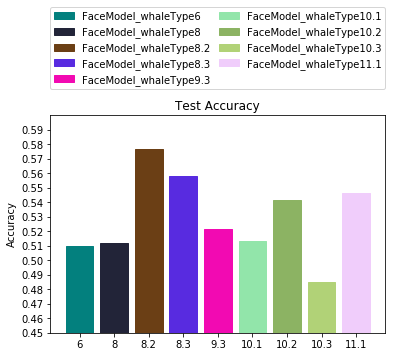

,FaceModel_whaleType10.1,FaceModel_whaleType10.2,FaceModel_whaleType10.3,FaceModel_whaleType11.1,FaceModel_whaleType6,FaceModel_whaleType8,FaceModel_whaleType8.2,FaceModel_whaleType8.3,FaceModel_whaleType9.3
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
batch_size,400,400,400,400,100,200,100,400,200
epochs,90,90,90,50,50,90,90,90,84
learning_rate,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
l2,0.0003,0.0005,0.01,0.0007,0.0001,0.0001,0.0001,0.0001,0.0001
all_examples,4500,4500,4500,4500,2100,4500,4500,4500,2100
Accuracy,0.513333,0.541667,0.485,0.546667,0.51,0.511667,0.576667,0.558333,0.521667
Test examples,600,600,600,600,600,600,600,600,600


In [28]:
fig, ax = plt.subplots()
ind = np.arange(1,len(types)+1)

np.random.seed(9)
bars = plt.bar(ind, acc)
colors = [np.random.rand(1,3) for _ in range(len(bars))]

[b.set_color(c[0]) for b,c in zip(bars,colors)]
ax.set_xticks(ind)
ax.set_xticklabels(types)
plt.legend(bars, title, bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)
ax.set_ylabel("Accuracy")
ax.set_title("Test Accuracy")

set_bounds(y_bound = (.45,.6), y_step = .01)
#plt.savefig("history/test_accuracy.jpg", bbox_inches = "tight", quality = 100, dpi = 150)#save_fig
plt.show()
all_params